# Plots matriciais

Os gráficos matriciais permitem traçar dados como matrizes codificadas por cores e também podem ser usados para indicar clusters dentro dos dados (mais tarde, na seção de Machine Learning, aprenderemos a formatear dados de cluster).

Comecemos por explorar o mapa térmico e o clutermap de Seaborn:

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [11]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


## Heatmap

Para que um mapa de calor funcione corretamente, seus dados já devem estar em uma forma de matriz e a função sns.heatmap basicamente apenas põe cor pra você. Por exemplo:

In [5]:
# Correlograma
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


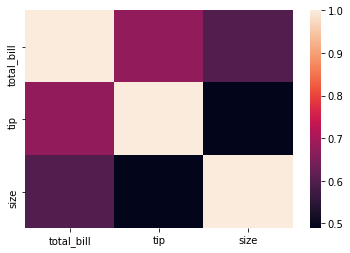

In [6]:
sns.heatmap(tips.corr())

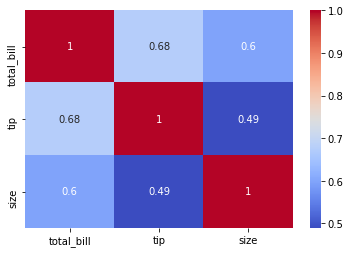

In [7]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Ou para os dados dos vôos:

In [8]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


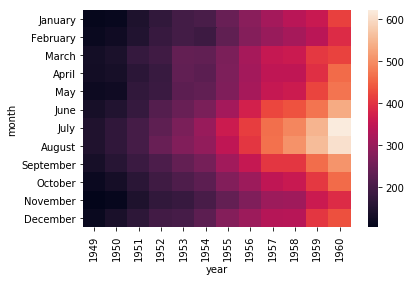

In [12]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

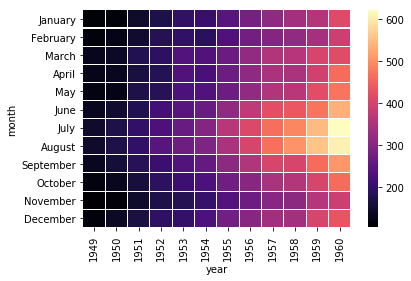

In [18]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=.1)

## clustermap

O clustermap usa agrupamento hierárquico para produzir uma versão em cluster do heatmap. Por exemplo:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


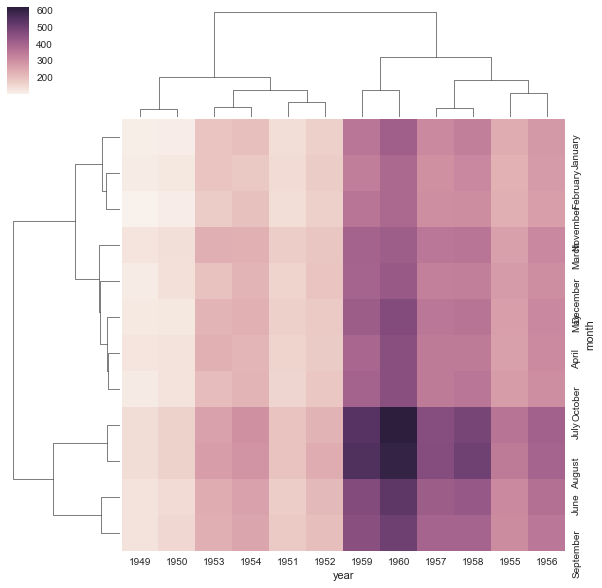

In [13]:
sns.clustermap(pvflights, standard_scale=1)

Observe agora como os anos e os meses não estão mais em ordem, em vez disso, eles são agrupados por similaridade em valor (contagem de passageiros). Isso significa que podemos começar a inferir coisas desse plot, como agosto e julho sendo semelhantes (faz sentido, uma vez que são ambos os meses de viagem de verão no hemisfério norte)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


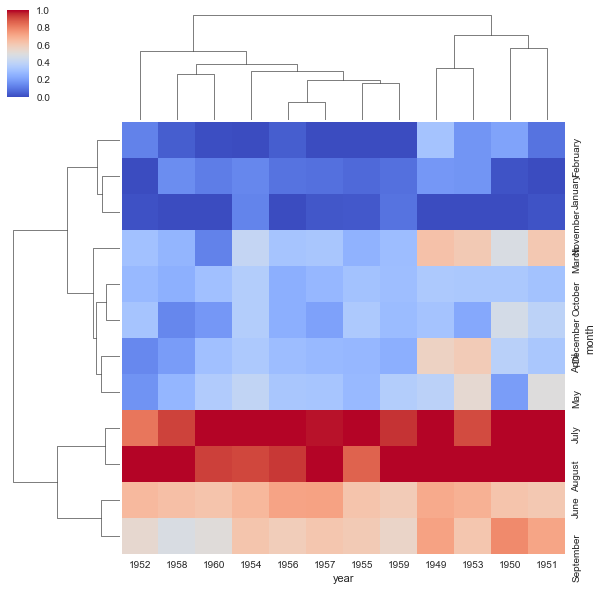

In [14]:
# Mais opções para obter a informação um pouco mais clara, como a normalização
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)